Accuracy: 0.3723150357995227


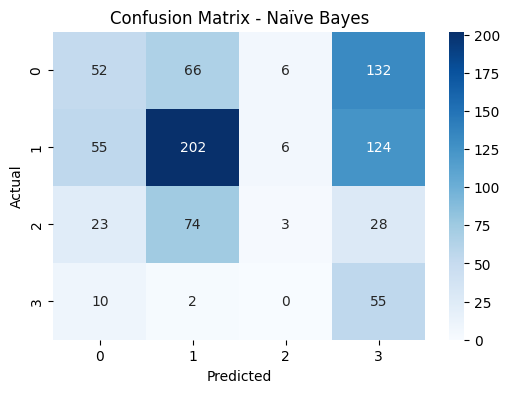

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.20      0.26       256
           1       0.59      0.52      0.55       387
           2       0.20      0.02      0.04       128
           3       0.16      0.82      0.27        67

    accuracy                           0.37       838
   macro avg       0.33      0.39      0.28       838
weighted avg       0.43      0.37      0.36       838



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset
df = pd.read_csv('./updated.csv')

# Encode Categorical Features
sel = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in sel:
    df[col] = le.fit_transform(df[col])

# Split Features and Target
x = df.drop(columns="Category")
y = df["Category"]

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Apply Naïve Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Predict on Test Data
y_pred = nb.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Generate Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

# Display Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))
